In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### Basic data analysis
Get familiar with feature distributions and values across categories for the url data. This just uses the url dataset, which has the following features:  
* `story_url`: the url of the story 
* `category`: the category the story belongs to
* `author`: username
* `num_comments`: number of comments left on the story
* `num_views`: number of hits
* `num_favorites`: number of people who favorited this story

In [2]:
df = pd.read_csv('../data/literotica_urls.tsv', sep='\t')
df.columns

/Users/morgane/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['story_url', 'num_pages', 'category', 'author', 'num_comments',
       'num_views', 'num_favorites'],
      dtype='object')

In [3]:
# Convert numeric categories to numbers
df.num_pages = pd.to_numeric(df.num_pages, errors='coerce')
df.num_comments = pd.to_numeric(df.num_comments, errors='coerce')
df.num_views = pd.to_numeric(df.num_views, errors='coerce')
df.num_favorites = pd.to_numeric(df.num_favorites, errors='coerce')

In [4]:
# Look at number of stories per categories
by_category = df.groupby('category')

print(len(by_category.groups), 'categories')

for category, group in by_category:
    print(category, '\t', group.story_url.count())

32 categories
OhMissScarlett 	 1
adult-how-to 	 5289
adult-humor 	 6091
adult-romance 	 7263
anal-sex-stories 	 7224
audio-sex-stories 	 16823
bdsm-stories 	 6578
chain-stories 	 3804
erotic-couplings 	 7390
erotic-horror 	 8415
erotic-letters 	 5704
erotic-novels 	 7995
exhibitionist-voyeur 	 8724
fetish-stories 	 9847
first-time-sex-stories 	 8325
gay-sex-stories 	 12084
group-sex-stories 	 7621
illustrated-erotic-fiction 	 8453
interracial-erotic-stories 	 9639
lesbian-sex-stories 	 7456
loving-wives 	 8363
masturbation-stories 	 7124
mature-sex 	 8188
mind-control 	 10917
non-consent-stories 	 9208
non-english-stories 	 8
non-erotic-stories 	 6256
non-human-stories 	 11091
reviews-and-essays 	 5560
science-fiction-fantasy 	 13514
taboo-sex-stories 	 8776
transsexuals-crossdressers 	 12096


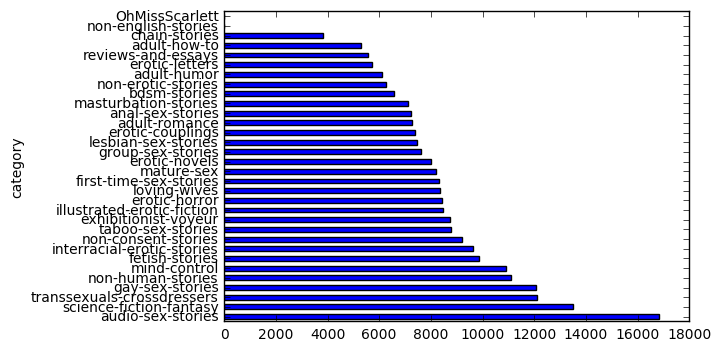

In [5]:
# What are the most popular categories? Sort them by story count
categories_ranked = by_category.count().sort_values('story_url', ascending=False).story_url

# Audio is by far the most popular. Science fiction stories are also v popular
# which is telling -- people who write fanfic online probably write erotica too
categories_ranked.plot.barh()

In [6]:
# Number of unique authors
by_author = df.groupby('author')
print('Number of authors:', len(by_author))

# Most popular authors by number of stories written
by_author.count().sort_values('story_url', ascending=False)['story_url'].head(10)

# cal y pygia - lol

Number of authors: 28941


author
Samuelx                1636
velvetpie              1126
JukeboxEMCSA           1055
sr71plt                1014
Cal Y. Pygia            915
Goldeniangel            723
Ashson                  695
BOSTONFICTIONWRITER     671
HarleyFatboy1           653
silkstockingslover      652
Name: story_url, dtype: int64

In [7]:
# Most popular authors by number of pages written
by_author.sum().sort_values('num_pages', ascending=False)['num_pages'].head(10)

author
silkstockingslover    2661.0
hammingbyrd7          2482.0
Samuelx               1772.0
sr71plt               1577.0
JukeboxEMCSA          1425.0
JimBob44              1424.0
walterio              1402.0
conanthe              1209.0
velvetpie             1142.0
Harddaysknight        1083.0
Name: num_pages, dtype: float64

In [8]:
# Most popular authors by number of comments received
by_author.sum().sort_values('num_comments', ascending=False)['num_comments'].head(10)

author
40                    331183.0
silkstockingslover     26841.0
Mirage                 13978.0
British Filth          13501.0
Harddaysknight         12589.0
StangStar06            10712.0
Tx Tall Tales           9518.0
DG Hear                 9168.0
scouries                6908.0
qhml1                   6897.0
Name: num_comments, dtype: float64

In [9]:
# Most popular authors by number of views
by_author.sum().sort_values('num_views', ascending=False)['num_views'].head(10)

author
silkstockingslover    259256973.0
Couture               113720135.0
rgjohn                105228873.0
velvetpie             101308723.0
dirtyjoe69             84009652.0
PhilCanyon             81087270.0
rondori                76732573.0
Dirty Slut             75470204.0
Hopebeach              72716250.0
Joseki Ko              71298738.0
Name: num_views, dtype: float64

In [10]:
# Most popular authors by number of favorites
by_author.sum().sort_values('num_favorites', ascending=False)['num_favorites'].head(10)

author
silkstockingslover    99416.0
Tx Tall Tales         34302.0
Mirage                16952.0
JukeboxEMCSA          16509.0
Ashson                15925.0
Mentalcase            15820.0
HeyAll                15285.0
Goldeniangel          14837.0
scouries              13990.0
British Filth         13158.0
Name: num_favorites, dtype: float64

In [11]:
# silkstockingslover ranks high across all stats, whereas velvetpie only gets a lot of views
# could be due to the volume of pages they've written (rank #1 there)

# Average page length per category
by_category.mean().sort_values('num_pages', ascending=False)['num_pages']

category
erotic-novels                 2.814884
science-fiction-fantasy       2.232796
illustrated-erotic-fiction    2.231397
taboo-sex-stories             2.085916
adult-romance                 2.057690
mind-control                  2.034258
loving-wives                  1.916298
non-human-stories             1.912542
erotic-horror                 1.864528
interracial-erotic-stories    1.851748
mature-sex                    1.807523
transsexuals-crossdressers    1.791749
gay-sex-stories               1.772509
chain-stories                 1.767350
lesbian-sex-stories           1.760595
group-sex-stories             1.747146
first-time-sex-stories        1.710631
non-consent-stories           1.696785
non-erotic-stories            1.671835
exhibitionist-voyeur          1.589065
bdsm-stories                  1.569778
fetish-stories                1.549000
erotic-couplings              1.535589
anal-sex-stories              1.499169
adult-humor                   1.376457
masturbation-sto

In [12]:
# Average number of comments per category
by_category.mean().sort_values('num_comments', ascending=False)['num_comments']

category
OhMissScarlett                331183.000000
loving-wives                      24.400574
audio-sex-stories                 12.346728
taboo-sex-stories                 11.832726
adult-how-to                      11.071280
illustrated-erotic-fiction        10.675500
non-human-stories                  9.645027
reviews-and-essays                 7.566367
interracial-erotic-stories         7.247432
adult-romance                      6.787003
gay-sex-stories                    6.533019
non-erotic-stories                 6.497442
transsexuals-crossdressers         6.000413
non-consent-stories                5.965027
first-time-sex-stories             5.885405
lesbian-sex-stories                5.621647
mind-control                       5.151965
mature-sex                         4.989619
science-fiction-fantasy            4.934586
chain-stories                      4.671150
erotic-horror                      4.662151
anal-sex-stories                   4.207641
adult-humor            

In [13]:
# Average number of views per category
by_category.mean().sort_values('num_views', ascending=False)['num_views']

category
non-english-stories           4.420685e+06
illustrated-erotic-fiction    3.511792e+05
taboo-sex-stories             2.088221e+05
loving-wives                  1.104185e+05
non-consent-stories           1.033373e+05
anal-sex-stories              9.479486e+04
mature-sex                    8.929734e+04
adult-how-to                  8.857463e+04
audio-sex-stories             8.322554e+04
first-time-sex-stories        7.998063e+04
group-sex-stories             7.188621e+04
interracial-erotic-stories    7.147102e+04
mind-control                  6.906263e+04
transsexuals-crossdressers    6.057086e+04
lesbian-sex-stories           5.969315e+04
fetish-stories                5.597306e+04
exhibitionist-voyeur          5.483349e+04
gay-sex-stories               4.805862e+04
masturbation-stories          4.652836e+04
bdsm-stories                  4.330831e+04
erotic-couplings              3.792063e+04
non-human-stories             2.908942e+04
chain-stories                 2.790188e+04
er

In [14]:
# Average number of favorites per category
by_category.mean().sort_values('num_favorites', ascending=False)['num_favorites']

# Readers favorite taboo sex stories disproportionately to views - i.e., a reader will favorite
# a higher proportion of taboo stories than other types of stories they view 

category
taboo-sex-stories             57.598564
adult-how-to                  28.226130
non-consent-stories           27.169219
transsexuals-crossdressers    25.703290
loving-wives                  25.042329
mind-control                  24.315654
interracial-erotic-stories    23.529412
non-human-stories             23.514742
illustrated-erotic-fiction    19.790370
anal-sex-stories              19.506091
first-time-sex-stories        18.796036
mature-sex                    18.397777
gay-sex-stories               18.370076
non-english-stories           17.000000
lesbian-sex-stories           16.822559
science-fiction-fantasy       15.083691
audio-sex-stories             14.986328
fetish-stories                14.154666
group-sex-stories             13.214670
erotic-horror                 12.656684
adult-romance                 11.846069
exhibitionist-voyeur          10.806282
masturbation-stories           9.447080
bdsm-stories                   8.389784
erotic-couplings               

**Note**: Taking the average in each column doesn't take into account the number of views. You can have a high average number of favorites but a smaller number of views. One issue, though, is that the number of views seems to be off. There are sometimes fewer views that "favorites." We need to make sure there are at least as many views as "favorites."  

In [15]:
# How many records does this apply to?
# print(len(df[df['num_favorites'] - df['num_views'] > 0]))
# print(df.num_views.where(df.num_views == 0).dropna().count())
# print(df.num_views.where(df.num_views < df.num_favorites).dropna().count())

weird_view_counts = df[df.num_favorites - df.num_views > 0]

df.loc[weird_view_counts.index, 'num_views'] = weird_view_counts.num_favorites

# Make sure this number is 0
print(df.num_views.where(df.num_views < df.num_favorites).dropna().count())

0


In [16]:
# Ranking of categories by average stats (# comments and # favorites) normalized by number of views
df['num_favorites_normalized'] = df.num_favorites / df.num_views

by_category = df.groupby('category')

In [17]:
# Rank favorites normalized by number of views
# i.e, 0.16% of gay stories get favorited
# this seems odd to me 
by_category.mean().sort_values('num_favorites_normalized', ascending=False)['num_favorites_normalized']

category
taboo-sex-stories             0.003644
erotic-couplings              0.002688
gay-sex-stories               0.001625
group-sex-stories             0.001141
science-fiction-fantasy       0.000972
non-human-stories             0.000933
transsexuals-crossdressers    0.000877
mature-sex                    0.000872
erotic-horror                 0.000789
bdsm-stories                  0.000740
fetish-stories                0.000640
first-time-sex-stories        0.000540
interracial-erotic-stories    0.000510
exhibitionist-voyeur          0.000505
adult-how-to                  0.000458
adult-romance                 0.000443
mind-control                  0.000441
lesbian-sex-stories           0.000409
erotic-novels                 0.000406
non-consent-stories           0.000313
loving-wives                  0.000265
non-erotic-stories            0.000244
audio-sex-stories             0.000217
anal-sex-stories              0.000217
reviews-and-essays            0.000213
masturbation-sto

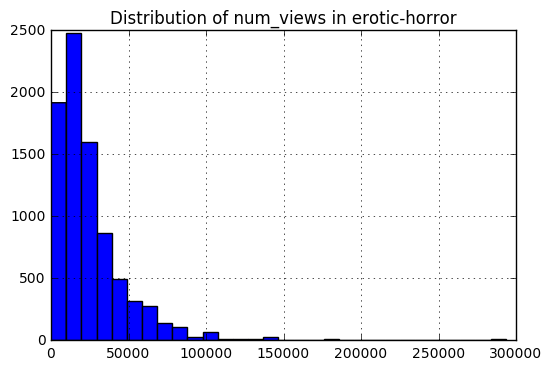

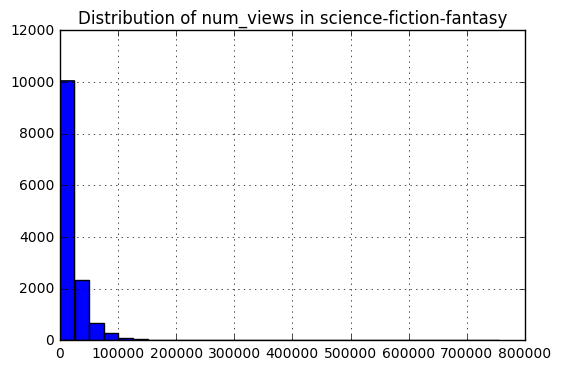

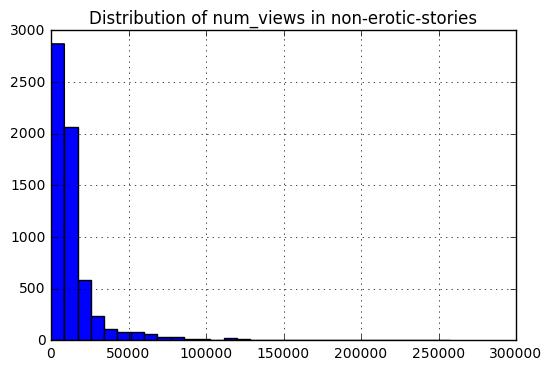

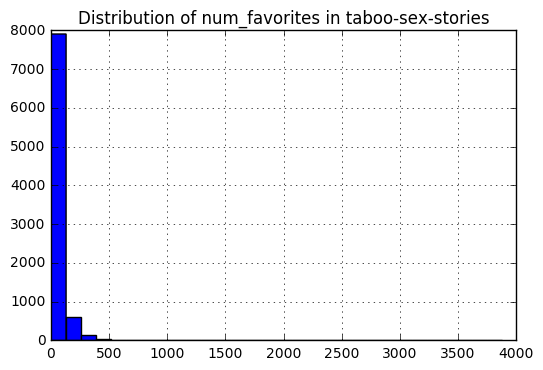

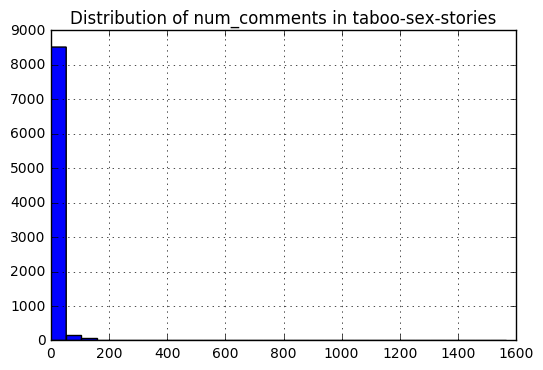

In [18]:
# Plot distributions of stats across categories
def plot_distribution(group, category, column):
    plt.figure()
    group[column].hist(bins=30).set_title('Distribution of ' + column + ' in ' + category)
        
def plot_all_distributions(column):
    for category, group in by_category:
        plot_distribution(group, category, column)
    
def plot_single_distribution(category, stat):
    group = by_category.get_group(category)
    plot_distribution(group, category, stat)

# Run this to get all distribution plots across categories
# plot_all_distributions('num_pages')
# plot_all_distributions('num_views')
# plot_all_distributions('num_comments')
# plot_all_distributions('num_favorites')
# plot_all_distributions('num_favorites_normalized')

# Displaying all takes too much memory so just look at a few:
plot_single_distribution('erotic-horror', 'num_views')
plot_single_distribution('science-fiction-fantasy', 'num_views')
plot_single_distribution('non-erotic-stories', 'num_views')

plot_single_distribution('taboo-sex-stories', 'num_favorites')
plot_single_distribution('taboo-sex-stories', 'num_comments')

(-100, 5000)

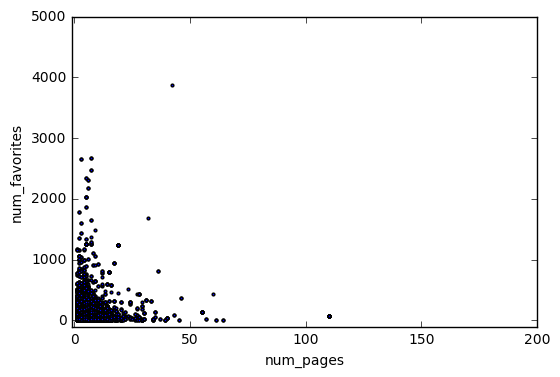

In [19]:
# Does page length correlate with number of favorites?
ax = plt.subplot(111)
df.plot.scatter('num_pages', 'num_favorites', s=4, ax=ax)
ax.set_xlim(-1, 200)
ax.set_ylim(-100, 5000)

# Seems to decrease as page length increases - mild trend for people favoring shorter stories

In [20]:
# plot all of them 
# for category, group in by_category:
#     plt.figure()
#     group.plot.scatter('num_pages', 'num_favorites').set_title(category)

### Story titles and usernames
What are the most common words and bigrams in story titles? What are the most common words and bigrams in usernames? What about collocations? How does this differ across categories? Is there any correlation between word ranking within a category and number of views? Is there a popular structure that is used in given categories (using part of speech tagging)? Can we predict popularity solely based on title and number of pages? Can we predict category based on title / username? Does POS tagging have any impact? What about named entities? Or domain-specific attributes like chapters or sequels (ex: "last night chp 2")? 

In [21]:
def url_to_title(url):
    return ' '.join(url.split('/')[-1].split('-'))

df['story_title'] = df.story_url.map(url_to_title)
df.story_title.head(15)

0                            anal at last 2
1                            katies eden  2
2                     turn abouts fair play
3                a mother in laws valentine
4                                  cat tail
5                           unfolding ch 06
6                 backdoor sweetheart ch 03
7                    my best friends girl 1
8                                anal album
9                           whos your daddy
10    how girls night changed my life ch 04
11               please give it to me daddy
12                   waking up with a smile
13                     love thy neighbor 24
14                             tamed by meg
Name: story_title, dtype: object

In [22]:
import nltk

# TODO will have to find a faster way, this is too slow 
words = []
for index, row in df.iterrows():
    words.extend(row.story_title.split())
    
word_counts = nltk.FreqDist(words)
print('Number of unique words:', len(word_counts))

Number of unique words: 21601


In [46]:
word_counts.most_common(20)

[('ch', 90501),
 ('the', 29900),
 ('02', 23750),
 ('a', 21819),
 ('01', 20568),
 ('and', 15987),
 ('1', 15042),
 ('03', 14530),
 ('of', 14183),
 ('pt', 10034),
 ('04', 9646),
 ('in', 9602),
 ('to', 9511),
 ('my', 9503),
 ('you', 7700),
 ('for', 7309),
 ('05', 6804),
 ('2', 6741),
 ('i', 6475),
 ('with', 5567)]

In [23]:
# There are a lot of stopwords, single-char words, and numbers, so remove these
# NOTE: do not remove these when doing POS tagging

from nltk.corpus import stopwords

# NOTE that there are no apostrophes in the titles
stop = set(stopwords.words('english'))

def clean_title(title):
    ws = title.split()
    for w in ws:
        # TODO this is going to be very slow as well
        try:
            int(w)
        except:
            if len(w) > 1 and not w in stop:
                yield w
                
# This is much faster
def get_word_counts(data):   
    words = []
    for title in data.story_title:
        words.extend(list(clean_title(title)))

    word_counts = nltk.FreqDist(words)
    return word_counts

In [48]:
# shorthands for "chapter" and "part" are most common 
word_counts = get_word_counts(df)
print('Number of unique words:', len(word_counts))
word_counts.most_common(20)

Number of unique words: 20961


[('ch', 90501),
 ('pt', 10034),
 ('love', 4231),
 ('night', 3545),
 ('new', 3276),
 ('day', 3124),
 ('sex', 2854),
 ('first', 2713),
 ('girl', 2548),
 ('time', 2512),
 ('two', 2465),
 ('wife', 2356),
 ('story', 2269),
 ('fun', 2183),
 ('one', 2086),
 ('man', 1845),
 ('young', 1836),
 ('fantasy', 1712),
 ('good', 1614),
 ('life', 1509)]

/Users/morgane/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


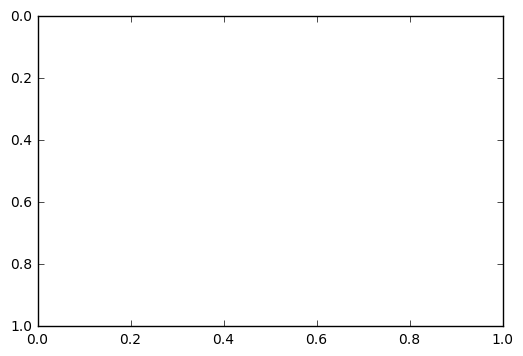

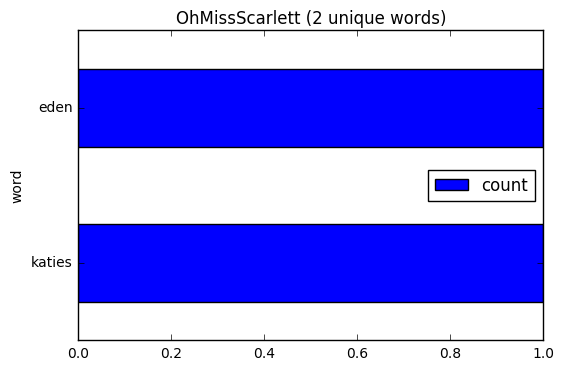

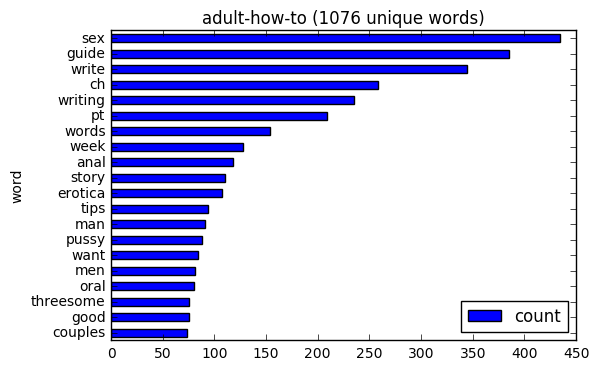

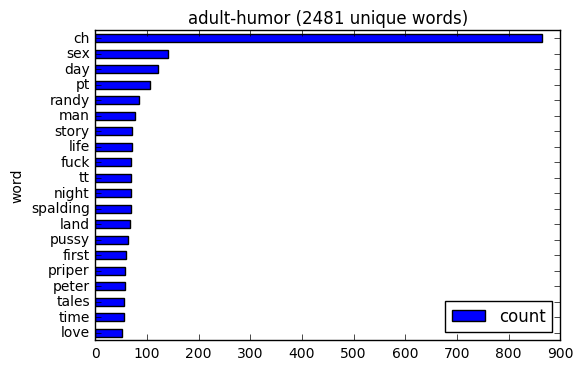

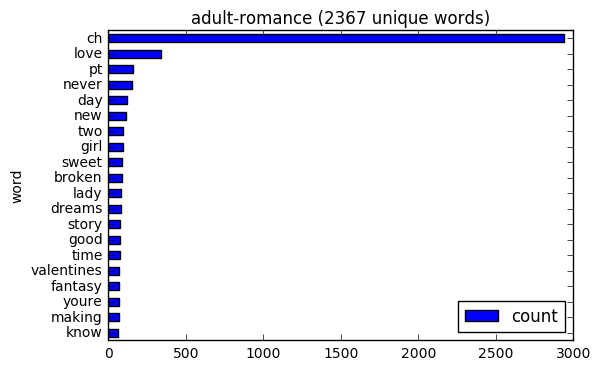

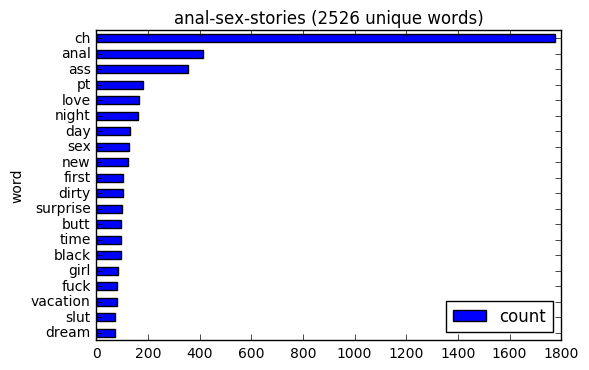

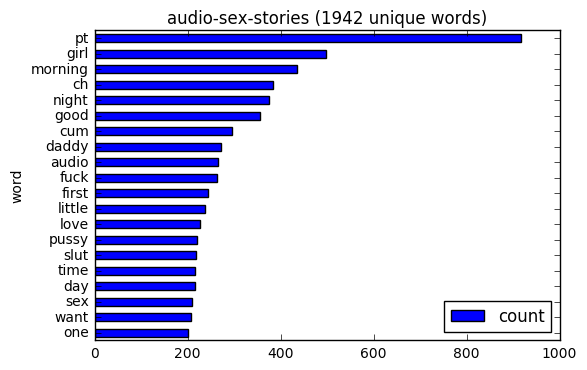

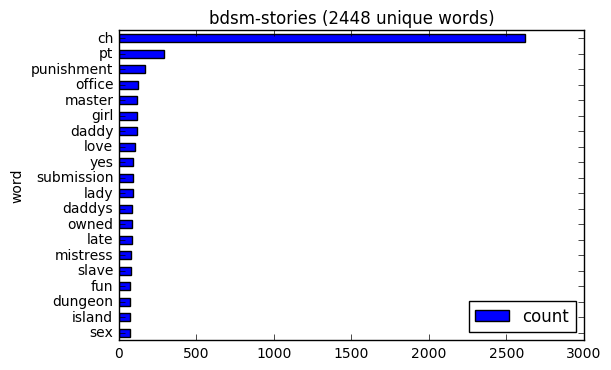

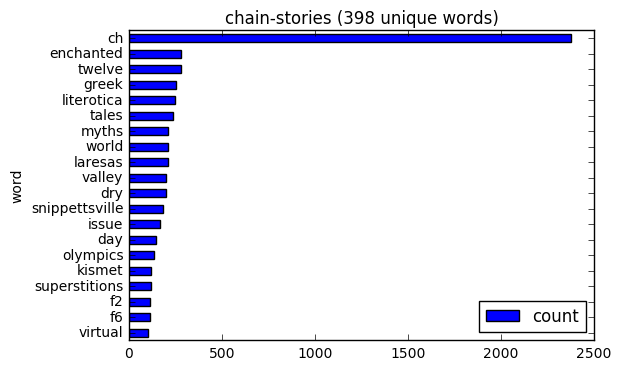

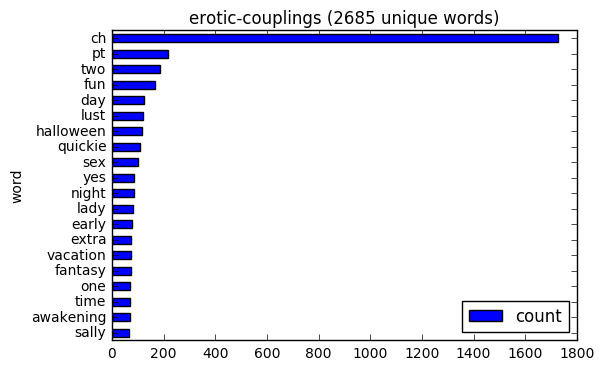

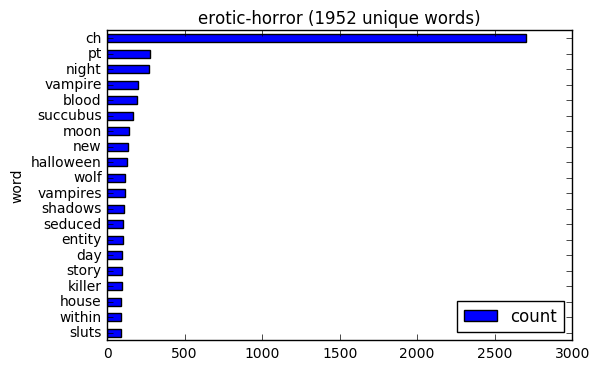

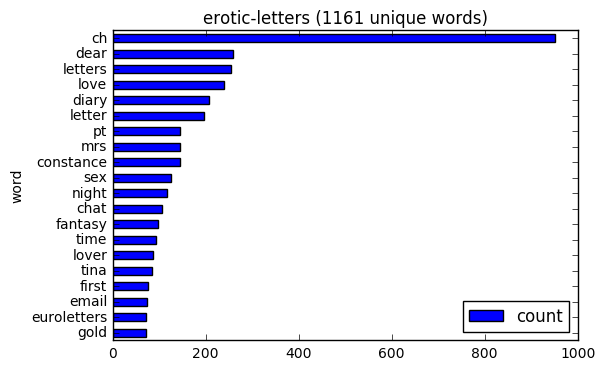

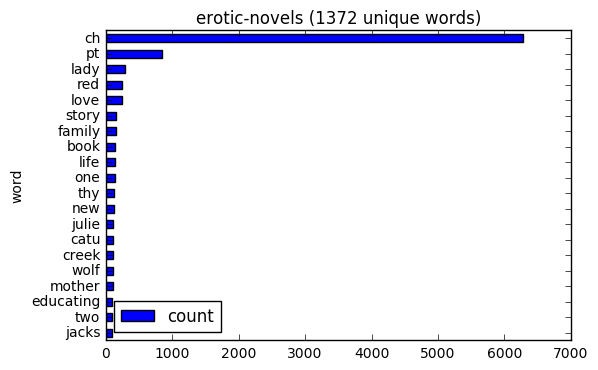

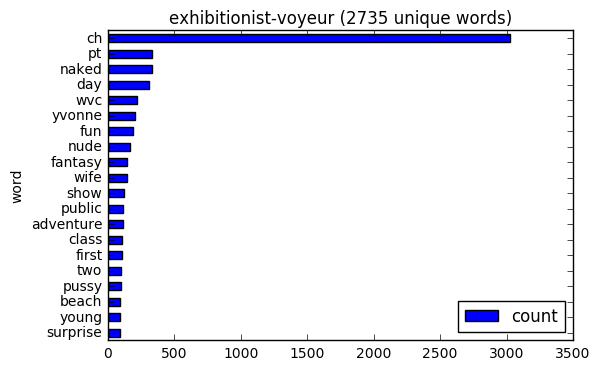

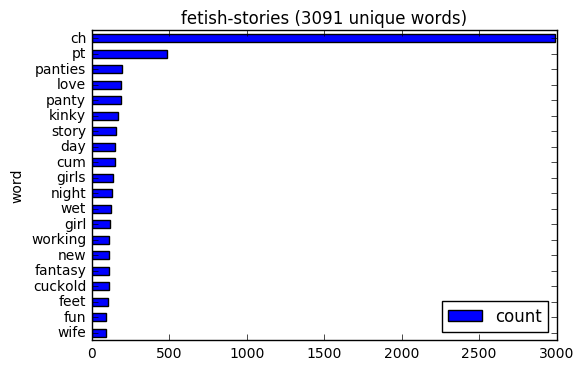

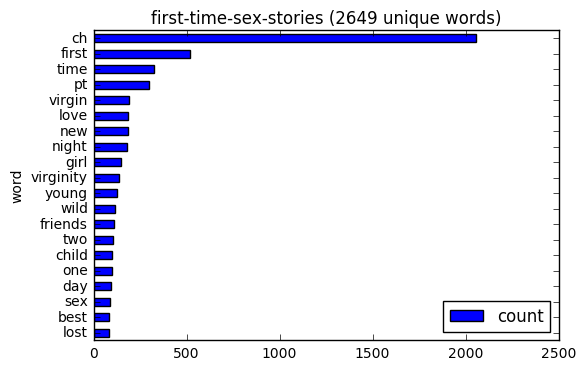

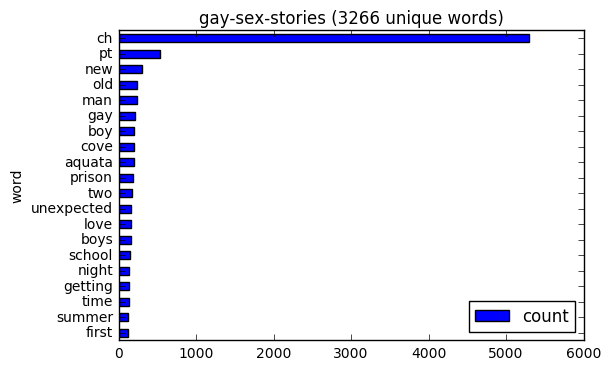

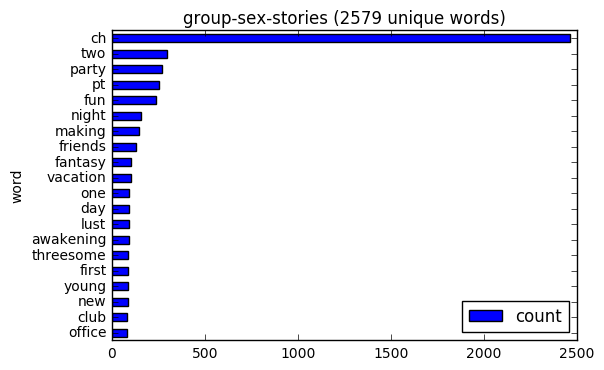

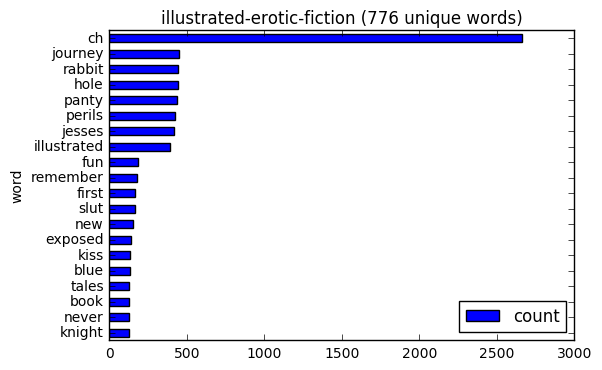

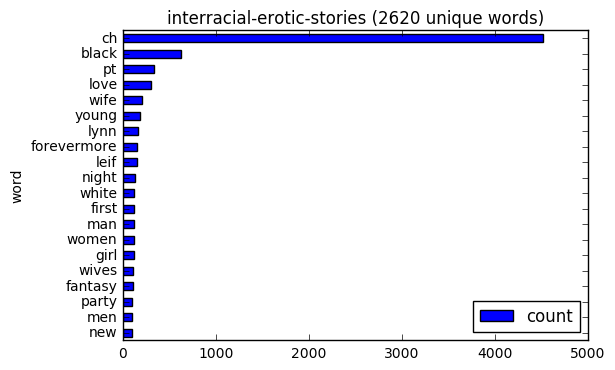

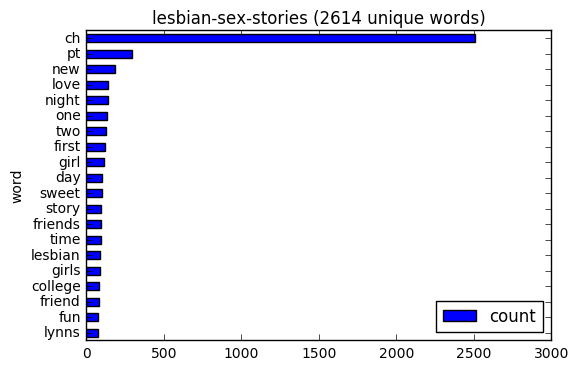

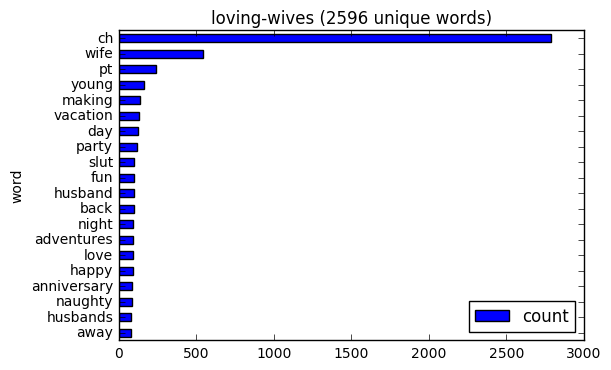

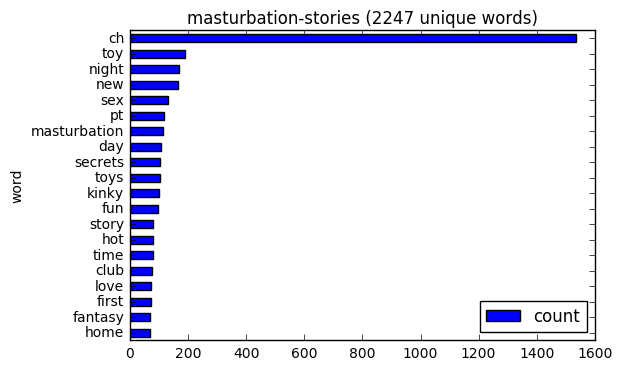

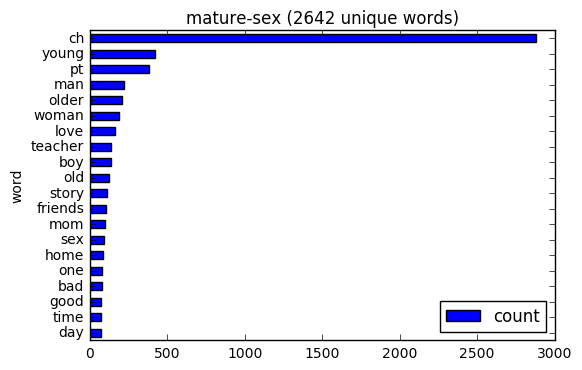

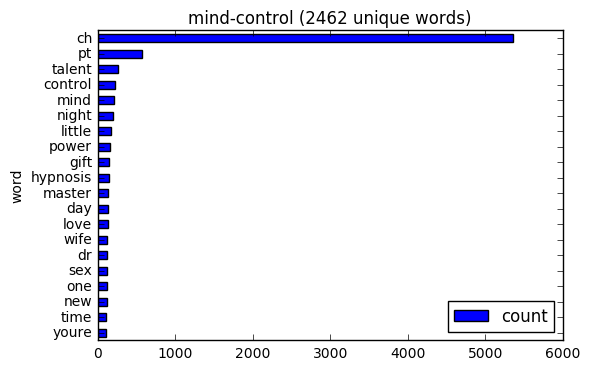

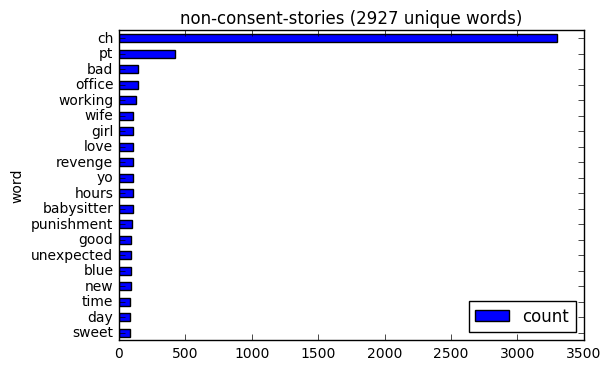

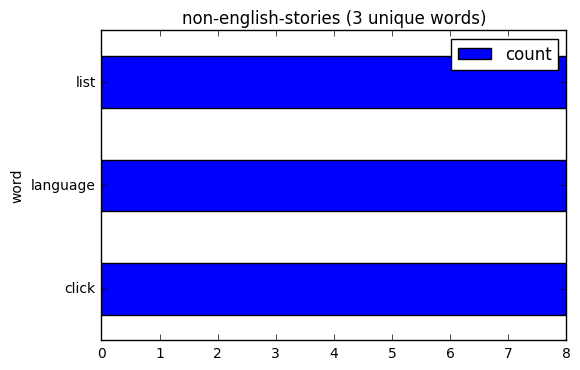

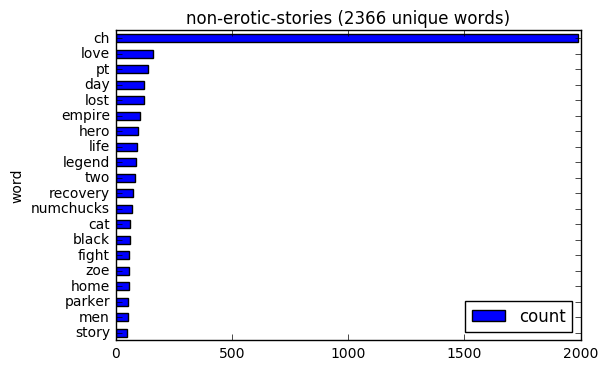

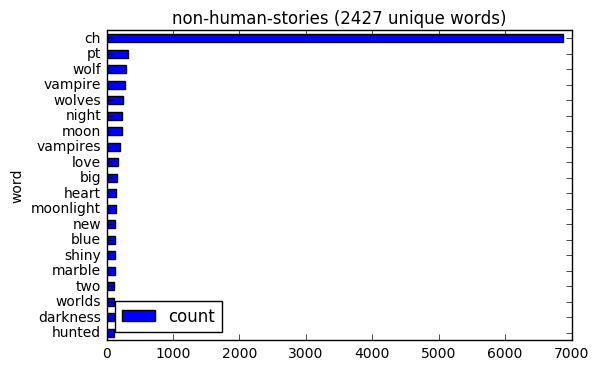

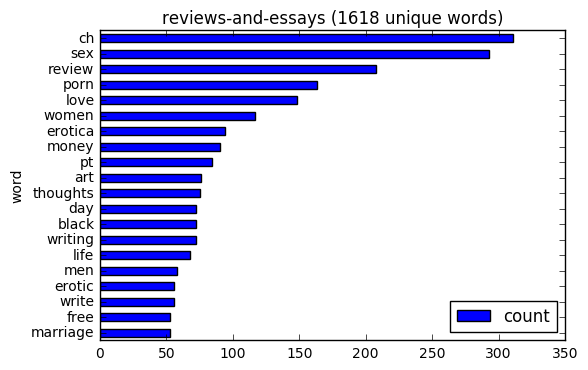

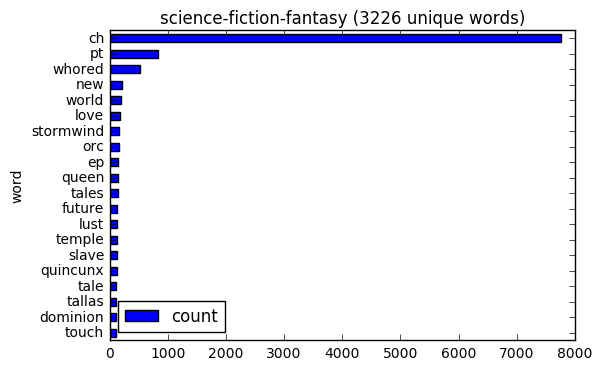

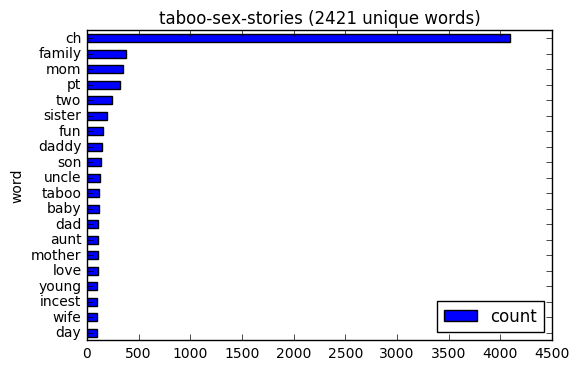

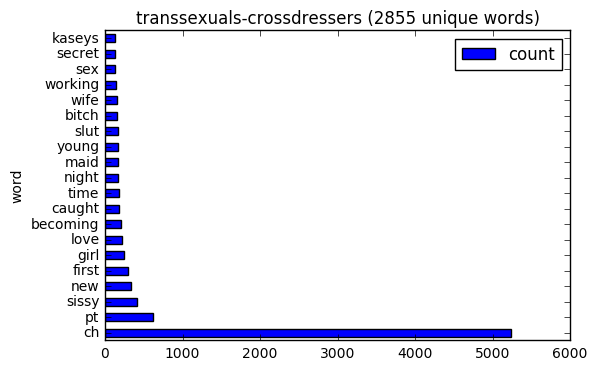

In [24]:
# What about most common words by category?
by_category = df.groupby('category')

def frequency_plot(category, counts, top=20):
    plt.gca().invert_yaxis()
    top_counts = counts.most_common(top)
    data = pd.DataFrame()
    data['word'] = [c[0] for c in top_counts]
    data['count'] = [c[1] for c in top_counts]
    data.index = data.word
    plot_title = category + ' (' + str(len(counts)) + ' unique words)'
    data.plot.barh().set_title(plot_title)

for category, group in by_category:
    counts = get_word_counts(group)
    frequency_plot(category, counts)

It looks like the categories are pretty well differentiated. Some interesting inferences:
* Fetish stories are about panties
* Gay sex happens in prisons, during the summer, and unexpectedly, while lesbian stories are about "sweet" "friends" who meet in "college" 
* Yvonne is a voyeur
* Vampires and succubi are sexy
* Chain stories are about Greek myths?? 
* BDSM and non-consent stories are about punishment at the office. Their profiles are similar but non-consent also features more babysitters
* Anal is sometimes a surprise (yikes)
* "Peter" seems to be the butt of jokes in `adult-humor`
* Valentine's Day is pivotal to adult romances
* Audio sex stories are played at night
* "Constance" and "Tina" are likely recipients of an erotic letter
* Group sex will be your awakening
* "Black" ranks much higher than "white" in interracial stories
* Doctors are into mind control?
* Non-erotic stories are about heros, legends, cats, Zoe & Parker??? and ...numchucks

Now let's take a look at **usernames**...

In [25]:
# Do users often cross-post?
num_categories_per_author = df.groupby('author')['category'].nunique().sort_values(ascending=False)

# For each author, coverage their stories have across all categories
coverage = num_categories_per_author / df.category.nunique()
coverage.head(20)

author
velvetpie               0.90625
RedHairedandFriendly    0.90625
Bakeboss                0.87500
Boxlicker101            0.87500
Decayed Angel           0.87500
Sean Renaud             0.81250
Goldeniangel            0.78125
PrincessErin            0.78125
Tara_Neale              0.78125
Middleagepoet           0.75000
SusanJillParker         0.75000
andtheend               0.75000
JimBob44                0.71875
sr71plt                 0.71875
BOSTONFICTIONWRITER     0.71875
SEVERUSMAX              0.68750
geronimo_appleby        0.68750
Svenskaflicka           0.68750
Many Feathers           0.68750
SuperHeroRalph          0.68750
Name: category, dtype: float64

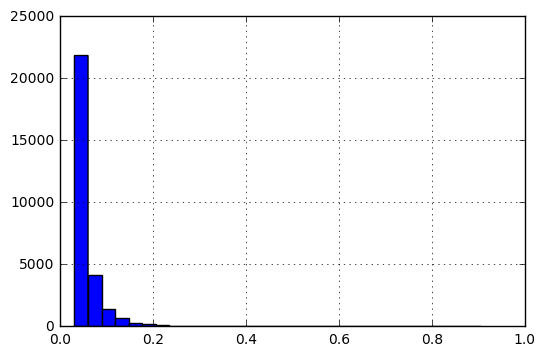

In [26]:
# Plot this distribution
coverage.hist(bins=30)

# Most writers cover 3 - 10% of the categories, meaning   

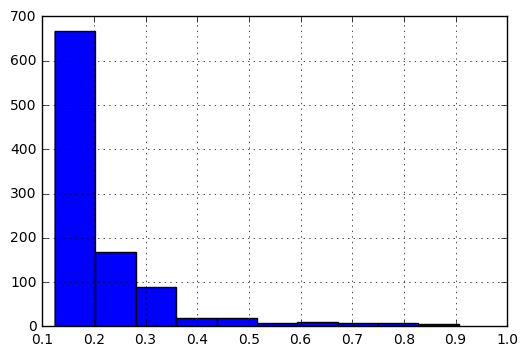

In [27]:
# Just look at the top 1000
coverage.head(1000).hist()